### Skill Requirements based on Jobs

1. What are the skills that are needed for almost all the jobs
2. What are the most important skills for a Data Analyst
3. What are the most important skills to ge thired in HDFC Bank
4. Years of Exp vs Requirements



In [132]:
import pandas as pd
df = pd.read_csv('jobs.csv')

df.head()

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110 Reviews,"Customer Service,Sales,Relationship Management",1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
1,6.012391e+10,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Product management,Market analysis,Change mana...",1 Day Ago,https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...
2,6.012391e+10,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
3,6.012391e+10,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
4,6.012301e+10,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759 Reviews,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",1 Day Ago,https://www.naukri.com/job-listings-sap-bo-con...,https://www.naukri.com/mindtree-jobs-careers-3...


### 1. Data Exploration

#### 1.1 Checking & Removing Null Values

In [133]:
df = df.dropna(subset = ['job_id','experience','resposibilities','company'])

#### 1.2 Remove Un-necessery Columns

In [134]:
df = df.drop(columns=['company_link','job_link','rating','reviews','posted_on','location'])

#### 1.3 Checking Duplicate Values

In [135]:
df = df.drop_duplicates(subset = 'job_id')

### 2. Data Cleaning

#### 2.1 Typecast job_id

In [136]:
df['job_id'] = df['job_id'].astype('int')

#### 2.2 Clean Experince Column

In [137]:
df['min_exp'] = df['experience'].str.replace(' Yrs','').str.strip().str.split('-').str[0].astype('int')
df['max_exp'] = df['experience'].str.replace(' Yrs','').str.strip().str.split('-').str[1].astype('int')

df.head()

,job_id,job_role,company,experience,salary,resposibilities,min_exp,max_exp
0,70123006070,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Customer Service,Sales,Relationship Management",1,6
1,60123905908,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Product management,Market analysis,Change mana...",11,15
2,60123905898,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Business process,Change management,Team manage...",3,7
3,60123905897,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Business process,Change management,Team manage...",3,7
4,60123008332,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",5,7


#### 2.3 Clean Salary Column

In [140]:
df['clean_salary'] = df['salary'].str.replace(' PA.','').str.replace(',','').str.split('-').str[0].str.strip()
df = df[(df['clean_salary'] != '9.5 Cr and above') & (df['clean_salary'] != 'Less than 5000') &  (df['clean_salary'] != 'Less than 50000')]
df['min_salary'] = df['clean_salary'].str.split('(').str[0].str.strip()
del df['clean_salary']


df['clean_salary'] = df['salary'].str.replace(' PA.','').str.replace(',','').str.split('-').str[1].str.split('(').str[0].str.strip()
df = df[df['clean_salary'] != '9.5 Cr and above']
df['max_salary'] = df['clean_salary'].fillna('Not disclosed')
del df['clean_salary']

del df['salary']
del df['experience']

### 3 Data Analysis

#### 3.1) What are the skills that are needed for almost all the jobs

In [153]:
df['resposibilities'].str.split(',').explode().value_counts().head(10)

,count
resposibilities,
Sales,4520
tied,3310
agency,3307
communication,2536
training,2216
Consulting,2101
Java,1958
team handling,1950
Customer Service,1915


#### 3.2) What are the most important skills for a Data Analyst


In [165]:
df[df['job_role'] == 'Data Analyst']['resposibilities'].str.split(',').explode().value_counts().head(10)

,count
resposibilities,
SQL,19
Excel,12
Data Analyst,11
data analysis,11
Data analysis,10
Tableau,9
Data Analysis,7
Python,6
Analytics,6


#### 3.3) What are the most important skills to ge thired in HDFC Bank

In [169]:
df[df['company'] == 'Hdfc Bank']['resposibilities'].str.split(',').explode().value_counts().head(10)

,count
resposibilities,
Relationship Management,4
banking,4
Portfolio Management,4
Treasury Sales,3
Treasury Advisory Group,3
Treasury,3
HNI Client Handling,3
Sales,3
Retail Branch Banking,3


#### 3.4 Years of Exp vs Requirements

In [209]:
experience = []
job_counts = []

for exp in range(0,32):
  experience.append(exp)
  job_counts.append(len(df[(df['max_exp'] >= exp) & (df['min_exp'] <= exp)]))

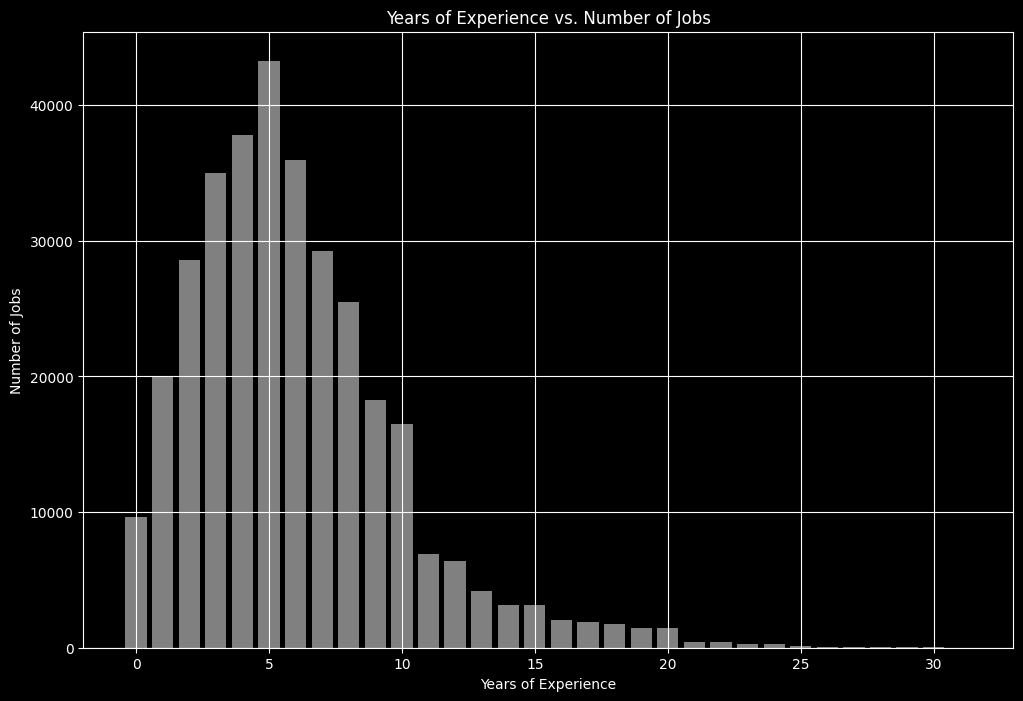

In [218]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.style.use('dark_background')
plt.grid(True)
plt.bar(experience, job_counts, color='gray')
plt.xlabel("Years of Experience")
plt.ylabel("Number of Jobs")
plt.title("Years of Experience vs. Number of Jobs")

plt.show()